In [21]:
import pandas as pd
from pandas.plotting import scatter_matrix
from numpy import log10
from scipy.stats import boxcox

from src.clean_data import clean_data

In [22]:
data = clean_data()

In [23]:
data

,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
id,,,,,,,,,,,,,
385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347.0,8363.473,Over many missions and against impossible odds...,340000000.0,"['Universal Pictures', 'Original Film', 'One R...",6.520000e+08,142.0,The end of the road begins.
603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896.0,4210.313,"With the price on his head ever increasing, Jo...",90000000.0,"['Thunder Road', '87Eleven', 'Summit Entertain...",4.317692e+08,170.0,"No way back, one way out."
502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628.0,3394.458,"While working underground to fix a water main,...",100000000.0,"['Universal Pictures', 'Illumination', 'Ninten...",1.308767e+09,92.0,NaN
569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160.0,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000.0,"['Columbia Pictures', 'Sony Pictures Animation...",3.135222e+08,140.0,It's how you wear the mask that matters
667538,Transformers: Rise of the Beasts,2023-06-06,"['Action', 'Adventure', 'Science Fiction']",English,7.4,195.0,2453.807,When a new threat capable of destroying the en...,200000000.0,"['Skydance', 'Paramount', 'di Bonaventura Pict...",1.710455e+08,127.0,Unite or fall.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14736,Love & Basketball,2000-04-21,"['Comedy', 'Drama', 'Romance']",English,7.5,383.0,12.306,Monica Wright and Quincy McCall grew up in the...,20000000.0,['40 Acres and a Mule Filmworks'],2.772812e+07,124.0,All's fair in love and basketball.
329981,Shut In,2016-11-11,"['Drama', 'Thriller']",English,5.3,639.0,12.303,A widowed child psychologist lives in an isola...,10000000.0,"['EuropaCorp', 'Lava Bear Films', 'Transfilm I...",1.308207e+07,91.0,Some fears can't be shut out.
9442,Dead Men Don't Wear Plaid,1982-05-21,"['Comedy', 'Mystery']",English,6.6,324.0,12.301,Juliet Forrest is convinced that the reported ...,9000000.0,"['Universal Pictures', 'Aspen Film Society']",1.819617e+07,89.0,Laugh...or I’ll blow your lips off!


In [24]:
data["days_since_release"] = (pd.Timestamp.now() - data["release_date"]).dt.days

In [25]:
data.count().sort_values()

tagline                 4397
title                   4673
genres                  4673
release_date            4673
vote_average            4673
vote_count              4673
popularity              4673
original_language       4673
overview                4673
budget                  4673
revenue                 4673
production_companies    4673
runtime                 4673
days_since_release      4673
dtype: int64

In [26]:
data.describe()

,release_date,vote_average,vote_count,popularity,budget,revenue,runtime,days_since_release
count,4673,4673.000000,4673.000000,4673.000000,4.673000e+03,4.673000e+03,4673.000000,4673.000000
mean,2003-08-05 16:03:17.218061184,6.652129,2915.616948,36.400257,4.007142e+07,1.265196e+08,110.919752,7316.331051
min,1915-02-08 00:00:00,2.900000,8.000000,12.300000,5.000000e+00,1.000000e+00,25.000000,72.000000
25%,1996-08-16 00:00:00,6.100000,737.000000,15.429000,1.000000e+07,1.776801e+07,96.000000,3179.000000
50%,2007-04-12 00:00:00,6.700000,1545.000000,20.001000,2.500000e+07,5.607043e+07,107.000000,5971.000000
75%,2014-12-03 00:00:00,7.200000,3489.000000,30.006000,5.000000e+07,1.464978e+08,122.000000,9862.000000
max,2023-06-06 00:00:00,8.800000,33822.000000,8363.473000,4.600000e+08,2.923706e+09,254.000000,39637.000000
std,NaN,0.785469,3729.535220,167.909219,4.716629e+07,2.074452e+08,20.877501,5687.945601


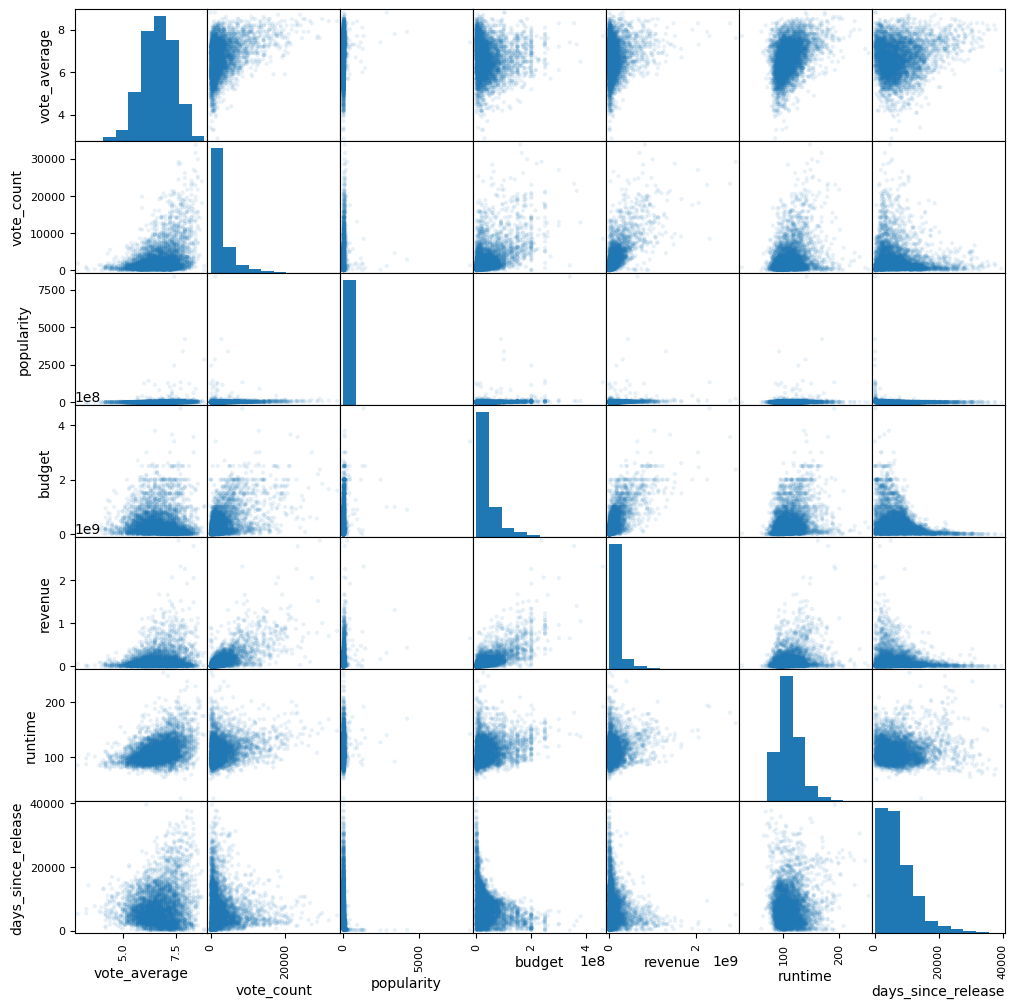

In [27]:
scatter_matrix(data, alpha=0.1, figsize=(12, 12));

In [28]:
corr = data.select_dtypes("number").corr()
corr.style.background_gradient(cmap='coolwarm')

,vote_average,vote_count,popularity,budget,revenue,runtime,days_since_release
vote_average,1.000000,0.380740,0.085247,-0.011736,0.170434,0.389740,0.159576
vote_count,0.380740,1.000000,0.070501,0.515106,0.710829,0.252281,-0.145126
popularity,0.085247,0.070501,1.000000,0.197278,0.173563,0.069486,-0.092909
budget,-0.011736,0.515106,0.197278,1.000000,0.719406,0.257547,-0.288807
revenue,0.170434,0.710829,0.173563,0.719406,1.000000,0.242614,-0.169462
runtime,0.389740,0.252281,0.069486,0.257547,0.242614,1.000000,0.045425
days_since_release,0.159576,-0.145126,-0.092909,-0.288807,-0.169462,0.045425,1.000000


In [35]:
transformed_data = (
    data
    .assign(vote_count=lambda x: log10(x["vote_count"]))
    .assign(popularity=lambda x: log10(x["popularity"]))
    .assign(budget=lambda x: log10(x["budget"]))
    .assign(revenue=lambda x: log10(x["revenue"]))
    .assign(days_since_release=lambda x: log10(x["days_since_release"]))
)

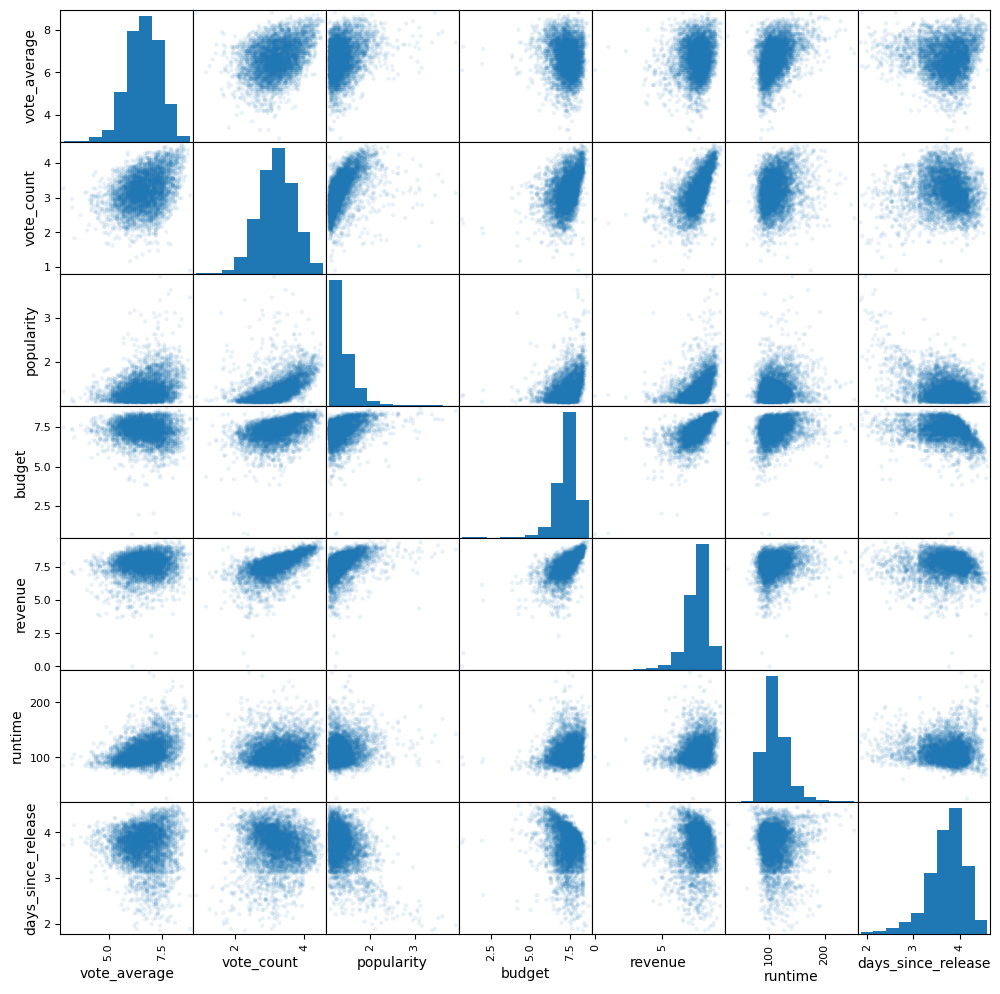

In [36]:
scatter_matrix(transformed_data, alpha=0.1, figsize=(12, 12));

In [37]:
transformed_corr = transformed_data.select_dtypes("number").corr()
transformed_corr.style.background_gradient(cmap='coolwarm')

,vote_average,vote_count,popularity,budget,revenue,runtime,days_since_release
vote_average,1.000000,0.355951,0.251406,-0.114421,0.118842,0.389740,0.014696
vote_count,0.355951,1.000000,0.503771,0.414320,0.603782,0.185823,-0.059791
popularity,0.251406,0.503771,1.000000,0.308817,0.398314,0.148655,-0.407014
budget,-0.114421,0.414320,0.308817,1.000000,0.636204,0.232766,-0.242468
revenue,0.118842,0.603782,0.398314,0.636204,1.000000,0.200360,-0.032533
runtime,0.389740,0.185823,0.148655,0.232766,0.200360,1.000000,-0.024740
days_since_release,0.014696,-0.059791,-0.407014,-0.242468,-0.032533,-0.024740,1.000000


In [38]:
box_cox_data = data.copy()
transform_cols = ["vote_count", "popularity", "budget", "revenue", "days_since_release"]
box_cox_lambdas = {}
for col in transform_cols:
    transformed_array, lmbda = boxcox(box_cox_data[col].values)
    box_cox_data[col] = transformed_array
    box_cox_lambdas[col] = lmbda
print(box_cox_lambdas)

{'vote_count': 0.04345831199374461, 'popularity': -1.0564651764524924, 'budget': 0.21278529558668077, 'revenue': 0.17594827426236964, 'days_since_release': 0.32328177463602936}


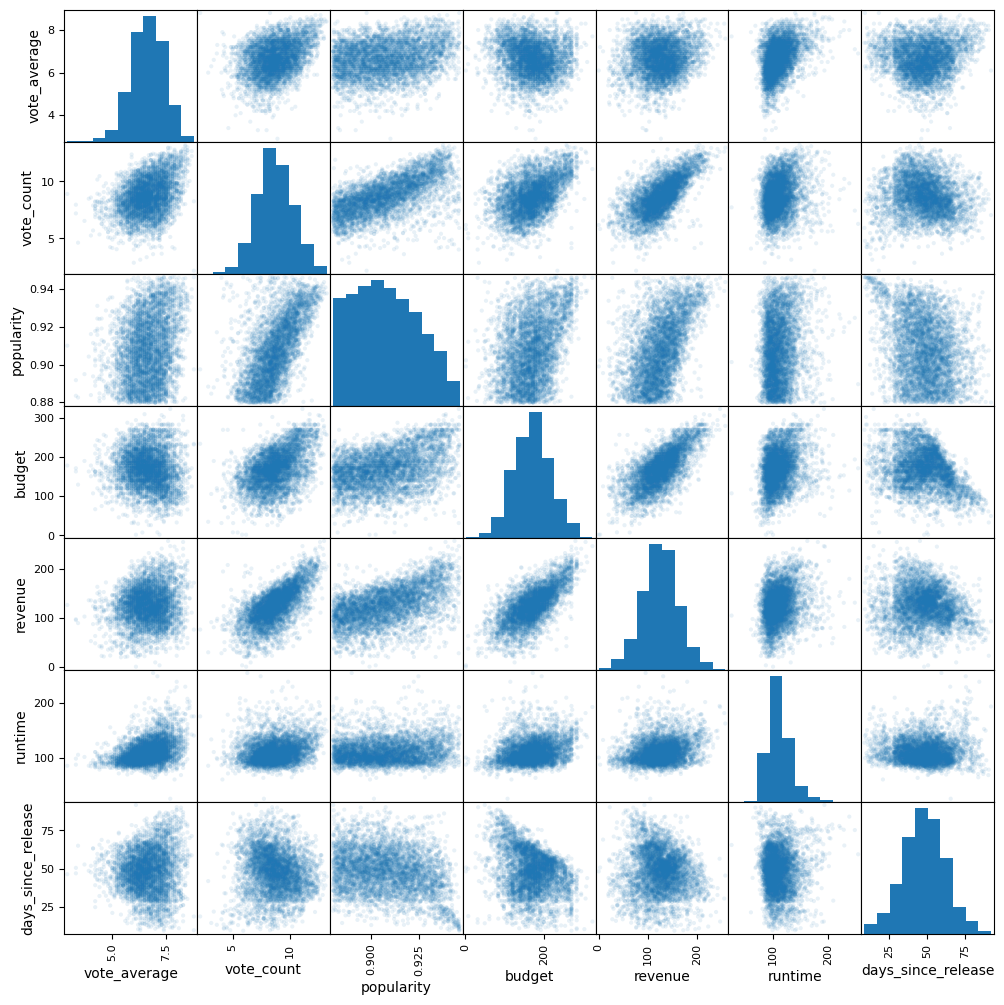

In [39]:
scatter_matrix(box_cox_data, alpha=0.1, figsize=(12, 12));

In [40]:
box_cox_corr = box_cox_data.select_dtypes("number").corr()
box_cox_corr.style.background_gradient(cmap='coolwarm')

,vote_average,vote_count,popularity,budget,revenue,runtime,days_since_release
vote_average,1.000000,0.361429,0.240280,-0.099332,0.132370,0.389740,0.069804
vote_count,0.361429,1.000000,0.617427,0.464145,0.667455,0.191302,-0.115764
popularity,0.240280,0.617427,1.000000,0.383558,0.515555,0.125769,-0.274452
budget,-0.099332,0.464145,0.383558,1.000000,0.691605,0.248097,-0.314264
revenue,0.132370,0.667455,0.515555,0.691605,1.000000,0.223644,-0.106295
runtime,0.389740,0.191302,0.125769,0.248097,0.223644,1.000000,0.002219
days_since_release,0.069804,-0.115764,-0.274452,-0.314264,-0.106295,0.002219,1.000000
